In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.font_manager as font_manager
fname = '/Library/Fonts/IBM_Plex_Sans/static/IBMPlexSans-Regular.ttf'  # download IBM Plex Sans
font_manager.fontManager.addfont(fname)
prop = font_manager.FontProperties(fname=fname)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

plt.rcParams.update({
    'font.size': 28,
    'axes.titlesize': 28,
    'axes.labelsize': 28,
    'xtick.labelsize': 24,
    'ytick.labelsize': 24,
    'legend.fontsize': 28,
    'figure.titlesize': 28
})

In [2]:
df_speed = pd.read_csv("../data/epoch_and_time.csv", header=[0,1,2,3], index_col=[0,1])
df_miou = pd.read_csv("../data/peft_table.csv", header=[0,1,2], index_col=[0,1])
models = ['DeCUR', 'Clay v1', 'Prithvi 1.0 100M', 'Prithvi 2.0 300M']
methods = ['Linear Prob.', 'Full FT', 'LoRA', 'VPT', 'ViT Adapter']
df_speed = df_speed.loc[models]
df_miou = df_miou.loc[models]

In [3]:
# Purple, Blue, green, dark blue, dark red, gray,  
colors = ["#A56EFF", "#009D9A", "#003A6D", "#0F62FE", "#9F1853", "#707070", '#33618a', '#33b1ae', '#b24675', '#fb7178']
marker = ['o', 'D', 'p', 'v', '^']

In [4]:
miou = df_miou[('test mIoU', 'mean')]
speed = df_speed[('total_time', 'mean')]
miou_mean = miou.mean(axis=1)
speed_mean = speed.mean(axis=1)
epoch = df_speed[('metrics.epoch', 'mean')]
epoch_mean = epoch.mean(axis=1)

/var/folders/sr/4k1bv9r565d12nx315mt59_r0000gp/T/ipykernel_93417/518762482.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  speed = df_speed[('total_time', 'mean')]
/var/folders/sr/4k1bv9r565d12nx315mt59_r0000gp/T/ipykernel_93417/518762482.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  epoch = df_speed[('metrics.epoch', 'mean')]


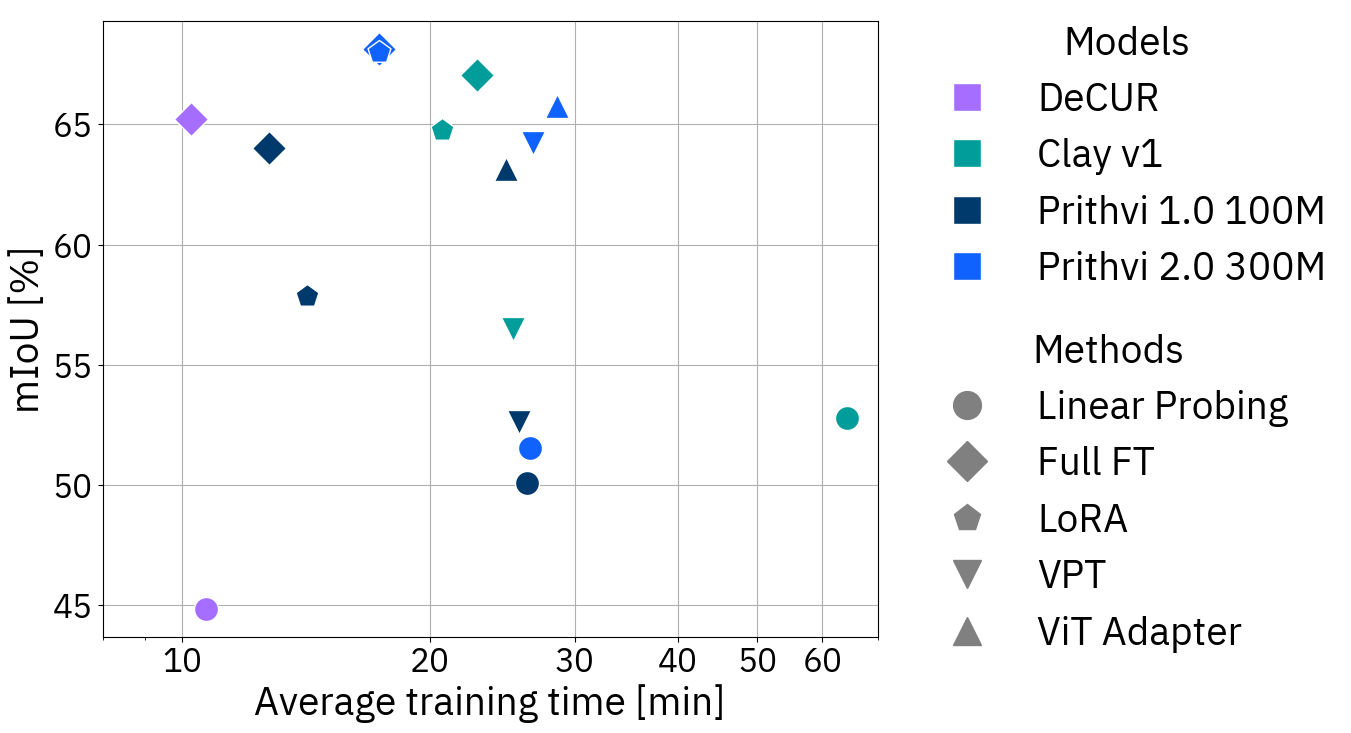

In [5]:
fig, ax = plt.subplots(figsize=(10,8))

for i, (model, method) in enumerate(miou_mean.index):
    ax.scatter(speed_mean.loc[(model, method)], miou_mean.loc[(model, method)], color=colors[models.index(model)], marker=marker[methods.index(method)], s=300, edgecolors='white')

# Legend elements for models (colors)
model_handles = [Line2D([0], [0], marker='s', color='w', label=model,
                        markerfacecolor=colors[i], markersize=20)
                 for i, model in enumerate(models)]

# Legend elements for methods (markers)
method_handles = [Line2D([0], [0], marker=marker[i], color='gray', label=method.replace('Prob.','Probing'),
                         linestyle='', markersize=20)
                  for i, method in enumerate(methods)]

# Add legends
legend2 = ax.legend(handles=method_handles, title="Methods", frameon=False, bbox_to_anchor=(1.02, 0.55), loc='upper left')
legend1 = ax.legend(handles=model_handles, title="Models", frameon=False, bbox_to_anchor=(1.02, 1.05), loc='upper left')

ax.add_artist(legend2)

ax.set_xscale('log')
xticks = [10, 20, 30,40, 50, 60]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)
ax.grid(True)
ax.set_axisbelow(True)

plt.xlabel('Average training time [min]')
plt.ylabel('mIoU [%]')
ax.set_xlim([8,70])
plt.savefig('../assets/time_miou.pdf', pad_inches=0, bbox_inches='tight')
plt.show()


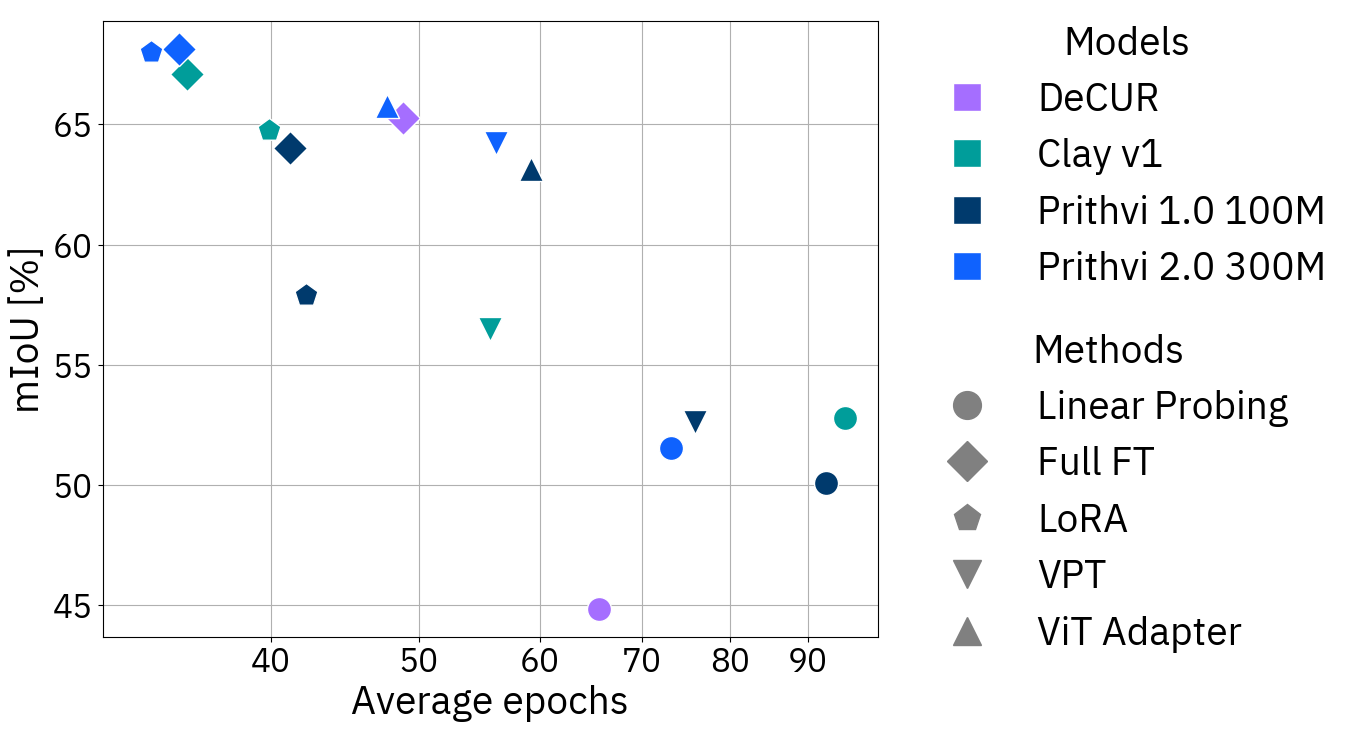

In [6]:
fig, ax = plt.subplots(figsize=(10,8))

for i, (model, method) in enumerate(miou_mean.index):
    ax.scatter(epoch_mean.loc[(model, method)], miou_mean.loc[(model, method)], color=colors[models.index(model)], marker=marker[methods.index(method)], s=300, edgecolors='white')

# Legend elements for models (colors)
model_handles = [Line2D([0], [0], marker='s', color='w', label=model,
                        markerfacecolor=colors[i], markersize=20)
                 for i, model in enumerate(models)]

# Legend elements for methods (markers)
method_handles = [Line2D([0], [0], marker=marker[i], color='gray', label=method.replace('Prob.','Probing'),
                         linestyle='', markersize=20)
                  for i, method in enumerate(methods)]

# Add legends
legend2 = ax.legend(handles=method_handles, title="Methods", frameon=False, bbox_to_anchor=(1.02, 0.55), loc='upper left')
legend1 = ax.legend(handles=model_handles, title="Models", frameon=False, bbox_to_anchor=(1.02, 1.05), loc='upper left')

ax.add_artist(legend2)

ax.grid(True)
ax.set_axisbelow(True)
plt.xlabel('Average epochs')
plt.ylabel('mIoU [%]')

ax.set_xscale('log')
xticks = [40, 50, 60, 70, 80, 90]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)
ax.set_xlim([31, 100])

plt.savefig('../assets/epochs_miou.pdf', pad_inches=0, bbox_inches='tight')
plt.show()

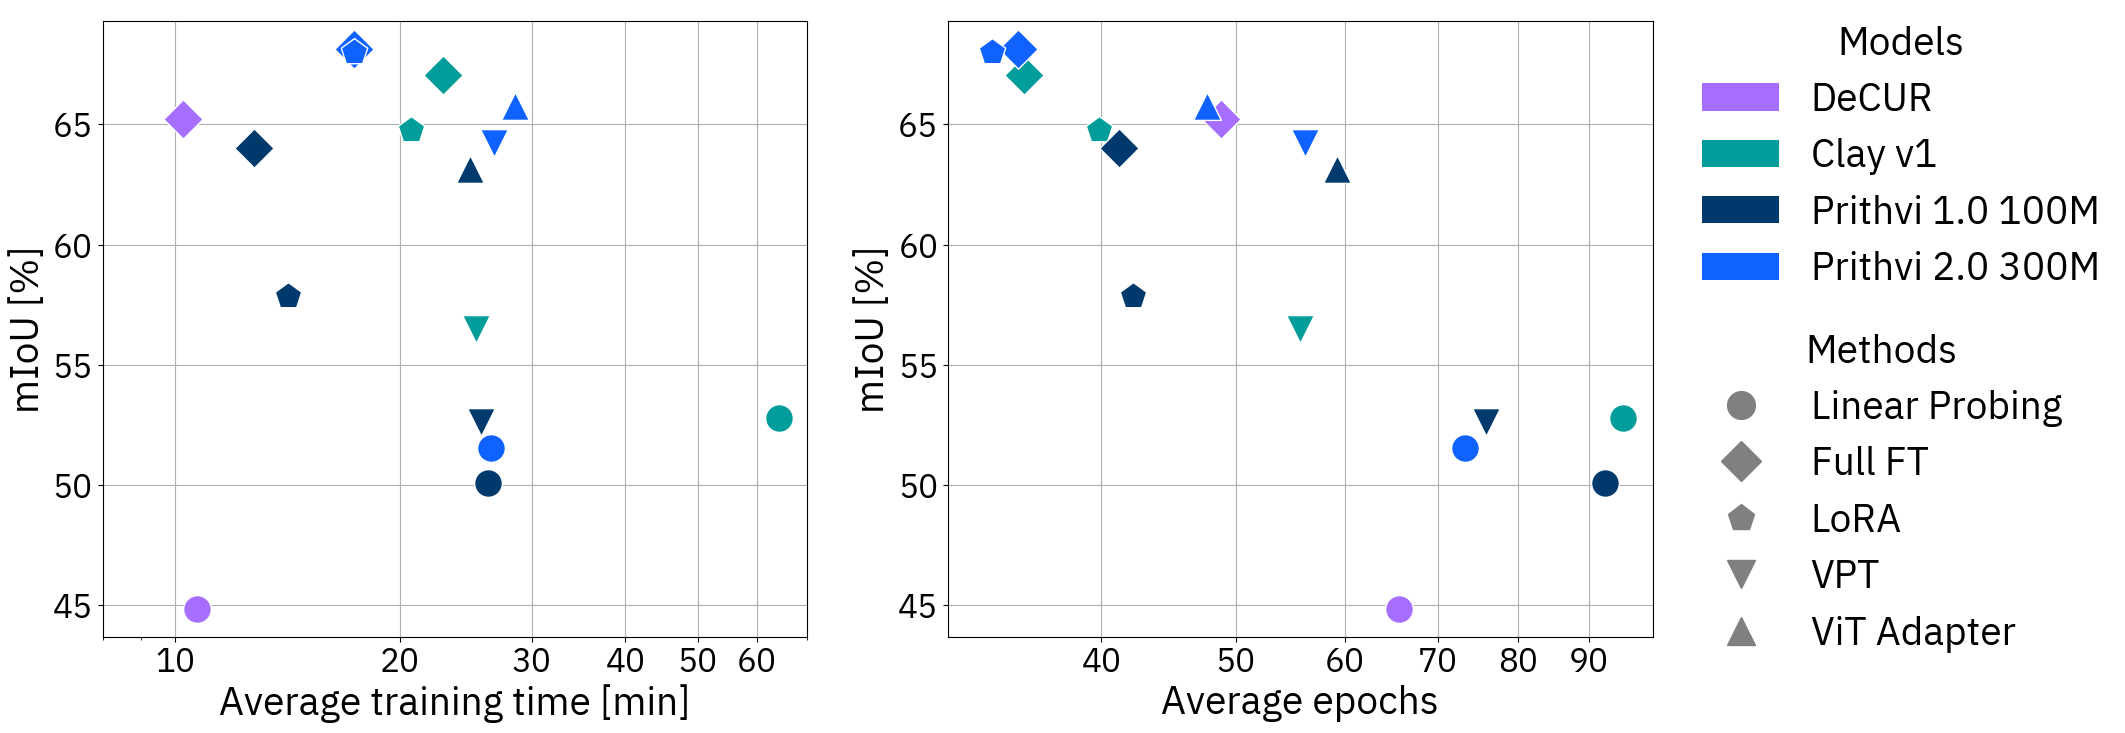

In [7]:
fig, ax = plt.subplots(ncols=2, figsize=(20,8))

for i, (model, method) in enumerate(miou_mean.index):
    ax[0].scatter(speed_mean.loc[(model, method)], miou_mean.loc[(model, method)], color=colors[models.index(model)], marker=marker[methods.index(method)], s=400, edgecolors='white')

for i, (model, method) in enumerate(miou_mean.index):
    ax[1].scatter(epoch_mean.loc[(model, method)], miou_mean.loc[(model, method)], color=colors[models.index(model)], marker=marker[methods.index(method)], s=400, edgecolors='white')

model_handles = [Patch(facecolor=colors[i], label=model) for i, model in enumerate(models)]

# Legend elements for methods (markers)
method_handles = [Line2D([0], [0], marker=marker[i], color='gray', label=method.replace('Prob.','Probing'),
                         linestyle='', markersize=20)
                  for i, method in enumerate(methods)]

# Add legends
legend2 = ax[1].legend(handles=method_handles, title="Methods", frameon=False, bbox_to_anchor=(1.02, 0.55), loc='upper left')
legend1 = ax[1].legend(handles=model_handles, title="Models", frameon=False, bbox_to_anchor=(1.02, 1.05), loc='upper left')

ax[1].add_artist(legend2)

ax[0].grid(True)
ax[0].set_axisbelow(True)
ax[1].grid(True)
ax[1].set_axisbelow(True)

ax[0].set_xscale('log')
xticks = [10, 20, 30,40, 50, 60]
ax[0].set_xticks(xticks)
ax[0].set_xticklabels(xticks)

ax[0].set_xlabel('Average training time [min]')
ax[0].set_ylabel('mIoU [%]')
ax[0].set_xlim([8,70])

ax[1].set_xscale('log')
xticks = [40, 50, 60, 70, 80, 90]
ax[1].set_xticks(xticks)
ax[1].set_xticklabels(xticks)
ax[1].set_xlim([31, 100])

ax[1].set_xlabel('Average epochs')
ax[1].set_ylabel('mIoU [%]')

plt.savefig('../assets/time_epochs_miou.pdf', pad_inches=0, bbox_inches='tight')
plt.show()